# Lie Detection with EEG signals

This is the code for research based on whether it is possible to classify EEG signals when a subject is lying or not.

We start with some necessary imports. (Tensorflow, Keras, Matplotlib, NumPy)

In [2]:
#Necessary imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

#Keras imports
from keras.models import *
from keras.layers import *

Using TensorFlow backend.


Then, a helper function I wrote myself.

In [3]:
from eegutils import utils

We can then read in our data which we previously collected.

In [4]:
#Read EEG data
PATH = "data/alldata"
x_train, y_train = utils.readDataShuffled(PATH)

data/alldata/total
appended data/alldata/total/tony_truth4.csv
appended data/alldata/total/chris_truth2.csv
appended data/alldata/total/amy_lie5.csv
appended data/alldata/total/luis_lie10.csv
appended data/alldata/total/tony_truth1.csv
appended data/alldata/total/sam_lie4.csv
appended data/alldata/total/luis_truth3.csv
appended data/alldata/total/amy_truth10.csv
appended data/alldata/total/namhee_truth2.csv
appended data/alldata/total/amy_truth3.csv
appended data/alldata/total/luis_lie6.csv
appended data/alldata/total/namhee_truth9.csv
appended data/alldata/total/yuchae_truth1.csv
appended data/alldata/total/jiwon_lie8.csv
appended data/alldata/total/luis_lie2.csv
appended data/alldata/total/namhee_lie10.csv
appended data/alldata/total/namhee_lie2.csv
appended data/alldata/total/chris_lie7.csv
appended data/alldata/total/jiwon_lie4.csv
appended data/alldata/total/sam_truth1.csv
appended data/alldata/total/tony_lie9.csv
appended data/alldata/total/sam_lie3.csv
appended data/alldata/tota

In [4]:
#Check shape of data
print(x_train.shape)
print(y_train.shape)

(160,)
(160,)


For the data to be trainable without the vanishing gradient problem, we must match them all to the same length. The longest sequence in the EEG dataset consists of 1515 timesteps, but we cut it off to 1000.

In [5]:
#Find longest EEG data
max([len(i) for i in x_train])

1515

In [5]:
#Pad sequences to make them all the same length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=1000, padding = 'post')
x_train.shape

(160, 1000, 2)

In [8]:
y_train.shape

(160,)

Let's look at what some of our data looks like.

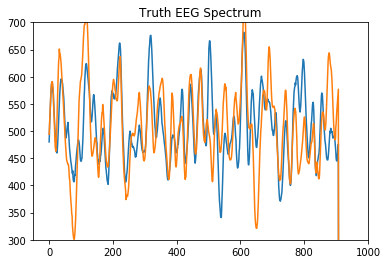

In [15]:
#Truth EEG spectrum
#(This can differ everytime this notebook is run, as the order of the data is randomized)
for i in range(len(y_train)):
    if y_train[i] == 1:
        break
plt.plot(x_train[i])
plt.title("Truth EEG Spectrum")
plt.xlim(right = 1000)
plt.ylim(300, 700)
plt.show()

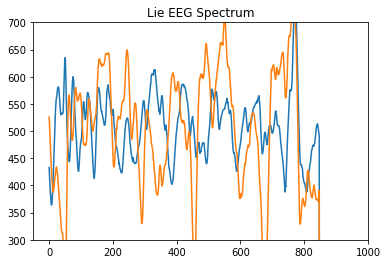

In [16]:
#Lie EEG Spectrum
#(This can differ everytime this notebook is run, as the order of the data is randomized)
for i in range(len(y_train)):
    if y_train[i] == 0:
        break
plt.plot(x_train[i])
plt.title("Lie EEG Spectrum")
plt.xlim(right = 1000)
plt.ylim(300, 700)
plt.show()

# Our first model

Time to build our model!
Our data isn't high dimensional, but it is very long. Originally the data was 1500 long, but that was wayy too long for any sort of learning to happen. So instead, we trimmed it down to 1000 timesteps -- which should be enough.

Our model consists of 3 LSTM layers as this is complex temporal data, and a final Dense layer at the end with a sigmoid activation function to classify lie and truth.

In [10]:
#Building our model
model = Sequential()
model.add(LSTM(64, return_sequences=True,
               input_shape=(1000, 2)))              # LSTM layer, returns a sequence of vectors of dimension 64
model.add(LSTM(64, return_sequences=True))          # LSTM layer, returns a sequence of vectors of dimension 64
model.add(LSTM(32))                                 # LSTM layer, returns a single vector of dimension 32
model.add(Dense(1, activation='sigmoid'))           # Dense layer, returns a single positive float

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])                 # Using the RMSprop optimizing algorithm

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1000, 64)          17152     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1000, 64)          33024     
_________________________________________________________________
lstm_3 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 62,625
Trainable params: 62,625
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(x_train, y_train, validation_split = 0.3, epochs = 20, batch_size = 4)  # Train for 20 epochs on 70% of the data

Train on 112 samples, validate on 48 samples
Epoch 1/20
112/112 [==============================] - 30s 272ms/step - loss: 0.6978 - acc: 0.5089 - val_loss: 0.6817 - val_acc: 0.5000
Epoch 2/20
112/112 [==============================] - 29s 262ms/step - loss: 0.6816 - acc: 0.5804 - val_loss: 0.6912 - val_acc: 0.5000
Epoch 3/20
112/112 [==============================] - 38s 336ms/step - loss: 0.6709 - acc: 0.5893 - val_loss: 0.7052 - val_acc: 0.4583
Epoch 4/20
112/112 [==============================] - 33s 295ms/step - loss: 0.6558 - acc: 0.6071 - val_loss: 0.6863 - val_acc: 0.5208
Epoch 5/20
112/112 [==============================] - 28s 249ms/step - loss: 0.6790 - acc: 0.5804 - val_loss: 0.6816 - val_acc: 0.5000
Epoch 6/20
112/112 [==============================] - 30s 269ms/step - loss: 0.6535 - acc: 0.5804 - val_loss: 0.6805 - val_acc: 0.4792
Epoch 7/20
112/112 [==============================] - 30s 268ms/step - loss: 0.6314 - acc: 0.5982 - val_loss: 0.6633 - val_acc: 0.5208
Epoch 8/20

# Plotting the loss and accuracy

We're done training. We can now see the loss and accuracy on a graph.

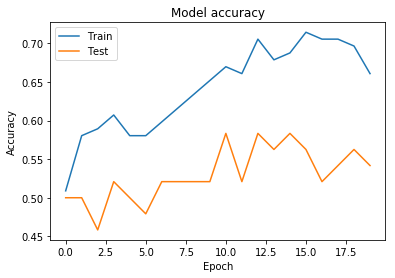

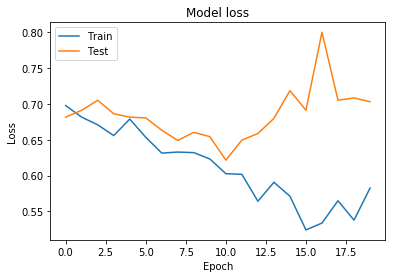

In [19]:
#Plot values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Saving the working model

Okay, so we have trained a model that actually kinda learns!
I will now save the model using Keras's built in model saving magic, and also the history of the training using Python's `pickle` library.

In [41]:
import pickle
model.save("models/firstworking.h5")
pickle.dump(history, open( "firstworkinghistory.p", "wb" ) )

We can load that up if we ever need to.

Meanwhile, let's see how the model does on some of the training data!

In [23]:
#Prediction
predictX = x_train[:30].reshape((30, 1000, 2))

In [24]:
from keras.models import load_model

model = load_model("models/firstworking.h5")
_, acc = model.evaluate(predictX, y_train[:30])
print("Accuracy:" + str(acc))

30/30 [==============================] - 1s 29ms/step
Accuracy:0.6666666865348816


Ehh... Not bad. 

But we want a higher accuracy because if we don't, then my entire academic integrity is fucked! So, lets overfit the fuck out of this.

# Our second model

This time, we're adding another LSTM layer and more steps to each layer.

We will also be saving the models that give us the best accuracies with Keras's `ModelCheckpoint()` feature.

In [51]:
from keras.callbacks import *

In [57]:
model2 = Sequential()
model2.add(LSTM(128, return_sequences=True,
               input_shape=(1000, 2)))  # returns a sequence of vectors of dimension 32
model2.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model2.add(LSTM(32, return_sequences=True))  # return a single vector of dimension 32
model2.add(LSTM(32))
model2.add(Dense(1, activation='sigmoid'))

mc_test = ModelCheckpoint('models/best_test_model.h5', monitor='acc', mode='max', verbose = 1, save_best_only=True)
mc_val = ModelCheckpoint('models/best_val_model.h5', monitor='val_acc', mode='max', verbose = 1, save_best_only=True)  #Save best model accuracy

model2.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [58]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 1000, 128)         67072     
_________________________________________________________________
lstm_34 (LSTM)               (None, 1000, 64)          49408     
_________________________________________________________________
lstm_35 (LSTM)               (None, 1000, 32)          12416     
_________________________________________________________________
lstm_36 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 33        
Total params: 137,249
Trainable params: 137,249
Non-trainable params: 0
_________________________________________________________________


In [59]:
history2 = model.fit(x_train, y_train, validation_split = 0.3, epochs = 40, batch_size = 4, callbacks=[mc_test, mc_val])  # Train for 40 epochs on 70% of the data

Train on 112 samples, validate on 48 samples
Epoch 1/40
112/112 [==============================] - 30s 265ms/step - loss: 0.6140 - acc: 0.6696 - val_loss: 0.6997 - val_acc: 0.4792

Epoch 00001: acc improved from -inf to 0.66964, saving model to models/best_test_model.h5

Epoch 00001: val_acc improved from -inf to 0.47917, saving model to models/best_val_model.h5
Epoch 2/40
112/112 [==============================] - 29s 261ms/step - loss: 0.5497 - acc: 0.7054 - val_loss: 0.7097 - val_acc: 0.5625

Epoch 00002: acc improved from 0.66964 to 0.70536, saving model to models/best_test_model.h5

Epoch 00002: val_acc improved from 0.47917 to 0.56250, saving model to models/best_val_model.h5
Epoch 3/40
112/112 [==============================] - 28s 253ms/step - loss: 0.5761 - acc: 0.6875 - val_loss: 0.6233 - val_acc: 0.5208

Epoch 00003: acc did not improve from 0.70536

Epoch 00003: val_acc did not improve from 0.56250
Epoch 4/40
112/112 [==============================] - 29s 255ms/step - loss:

112/112 [==============================] - 33s 296ms/step - loss: 0.5538 - acc: 0.6964 - val_loss: 0.5969 - val_acc: 0.5625

Epoch 00034: acc did not improve from 0.74107

Epoch 00034: val_acc did not improve from 0.68750
Epoch 35/40
112/112 [==============================] - 43s 381ms/step - loss: 0.5973 - acc: 0.6696 - val_loss: 0.5680 - val_acc: 0.6250

Epoch 00035: acc did not improve from 0.74107

Epoch 00035: val_acc did not improve from 0.68750
Epoch 36/40
112/112 [==============================] - 41s 363ms/step - loss: 0.5827 - acc: 0.6786 - val_loss: 0.6529 - val_acc: 0.6042

Epoch 00036: acc did not improve from 0.74107

Epoch 00036: val_acc did not improve from 0.68750
Epoch 37/40
112/112 [==============================] - 36s 324ms/step - loss: 0.5733 - acc: 0.7143 - val_loss: 0.4896 - val_acc: 0.7708

Epoch 00037: acc did not improve from 0.74107

Epoch 00037: val_acc improved from 0.68750 to 0.77083, saving model to models/best_val_model.h5
Epoch 38/40
112/112 [=========

And once again, after training for 40 epochs, we plot the l

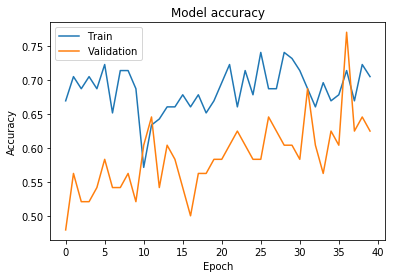

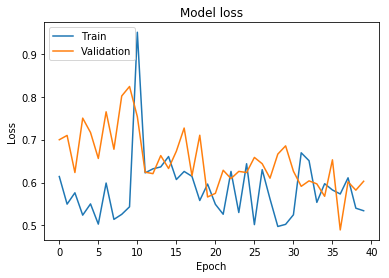

In [61]:
#Plot values
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Saved models

The highest training set accuracy achieved was 74.107%, and the validation accuracy for that model was 60.42%.

The highest validation set accuracy achieved was 77.083% (wtf??), and the training set accuracy for that moel was 71.43%.

In [62]:
val_model = model = load_model('models/best_val_model.h5')
_, overall_acc = val_model.evaluate(x_train, y_train, verbose=0)
print('Accuracy on total data set: %.3f' % (overall_acc))

Accuracy on total data set: 0.744


And so we achieve a total accuracy of 74.4% on the entire dataset -- pretty damn good considering the noisy data!